# EDA of google playstore apps data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#to run and display out of all the codes written in a single cell

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [4]:
data=pd.read_csv('/home/chandni/Downloads/data_analytics/project/cleaned_data.csv')
#loaded data into notebook

In [5]:
data.head(100)

,App Name,App Id,Category,Rating,Rating Count,Installs,Free,Price in USD,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,15,1,0.0,10M,7.1 and up,2020-02-26,2020-02-26,Everyone,0,0,0
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,7662,1,0.0,2.9M,5.0 and up,2020-05-21,2021-05-06,Everyone,1,0,0
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,58,1,0.0,3.7M,4.0.3 and up,2019-08-09,2019-08-19,Everyone,0,0,0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,19,1,0.0,1.8M,4.0.3 and up,2018-09-10,2018-10-13,Everyone,1,0,0
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,478,1,0.0,6.2M,4.1 and up,2020-02-21,2018-11-12,Everyone,0,0,0
5,IMOCCI,com.imocci,Social,0.0,0.0,89,1,0.0,46M,6.0 and up,2018-12-24,2019-12-20,Teen,0,1,0
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,2567,1,0.0,2.5M,4.1 and up,2019-09-23,2019-09-27,Everyone,1,0,0
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,702,1,0.0,16M,5.0 and up,2019-06-21,2019-06-21,Everyone,0,0,0
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,18,1,0.0,1.3M,4.4 and up,2018-12-07,2018-12-07,Teen,0,0,0
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,62433,1,0.0,3.5M,4.1 and up,2019-09-22,2020-10-07,Everyone,1,0,0


In [6]:
df1=data

In [7]:
data[data.duplicated()]
#checking for duplicates

,App Name,App Id,Category,Rating,Rating Count,Installs,Free,Price in USD,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice


In [8]:
data.isnull().sum().sum()
#to make sure data is ready for EDA

0

# EDA

#  app name analysis
#check whether same app names are there by diiferent app ids since app id have more unique values

In [9]:
(df1.groupby(['App Name'])['App Id'].count()).sort_values().unique()



array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  50,  51,  52,  53,
        55,  56,  57,  59,  60,  61,  62,  63,  66,  67,  68,  69,  72,
        74,  75,  76,  77,  78,  79,  84,  85,  91,  97,  99, 104, 106,
       108, 109, 111, 136, 137, 145, 147, 151, 164, 174, 190, 201, 256,
       261, 382])

In [10]:
(df1.groupby(['App Name'])['App Id'].count()==1).sum()

2110458

In [11]:
(df1.groupby(['App Name'])['App Id'].count()>1).sum()

67486

In [12]:
#thus some apps are there from more than 1 app id

In [13]:
df1.groupby(['App Name'])['App Id'].count().max()

382

In [14]:
(df1.groupby(['App Name'])['App Id'].count()).value_counts()

1      2110458
2        46054
3        10567
4         4031
5         2185
6         1278
7          805
8          529
9          399
10         286
11         212
12         195
13         135
14         107
15          92
16          79
17          70
18          57
19          44
21          43
20          32
23          29
22          25
24          23
27          17
28          14
25          14
29          10
30           9
26           9
34           8
35           7
31           6
32           6
40           5
39           5
37           5
44           4
55           4
60           4
33           4
59           4
43           3
41           3
50           3
56           3
52           3
38           3
48           3
63           2
97           2
46           2
57           2
42           2
77           2
51           2
45           2
69           2
382          1
108          1
47           1
151          1
99           1
61           1
174          1
67           1
79        

In [15]:
app382=df1.groupby(['App Name'])['App Id'].count()[df1.groupby(['App Name'])['App Id'].count()==382].index
app382

Index(['Tic Tac Toe'], dtype='object', name='App Name')

In [16]:
#thus there are 2110458 apps which are from single id only
#apps with name 'Tic Tac Toe' is published from 383 app ids

In [17]:
df1.groupby(['App Name'])['Content Rating'].count().sort_values(ascending=False).head(10)

App Name
Tic Tac Toe       382
Calculator        261
Flashlight        256
BMI Calculator    201
Age Calculator    190
Sudoku            174
Gallery           164
Unit Converter    151
Music Player      147
Solitaire         145
Name: Content Rating, dtype: int64

In [18]:
df1.groupby(['App Name'])['Content Rating'].value_counts().sort_values(ascending=False).head(10)

App Name        Content Rating
Tic Tac Toe     Everyone          381
Calculator      Everyone          258
Flashlight      Everyone          252
BMI Calculator  Everyone          200
Age Calculator  Everyone          187
Sudoku          Everyone          172
Gallery         Everyone          161
Unit Converter  Everyone          150
Music Player    Everyone          145
Solitaire       Everyone          137
Name: Content Rating, dtype: int64

In [19]:
#Tic Tac Toe has 381 for everyone, one is for which audience we have to find

In [20]:
df1[df1['App Name']=='Tic Tac Toe']['Content Rating'].value_counts()

Everyone    381
Teen          1
Name: Content Rating, dtype: int64

In [21]:
df1[(df1['App Name']=='Tic Tac Toe') & (df1['Content Rating']=='Teen')]

,App Name,App Id,Category,Rating,Rating Count,Installs,Free,Price in USD,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1157602,Tic Tac Toe,com.tictactoerahman,Puzzle,0.0,0.0,5,1,0.0,2.4M,5.0 and up,2020-02-13,2020-02-14,Teen,0,0,0


In [22]:
df1[(df1['App Name']=='Tic Tac Toe')]['Category'].value_counts()

Board            149
Puzzle           131
Casual            50
Strategy          31
Arcade            11
Educational        3
Trivia             2
Card               2
Adventure          1
Sports             1
Entertainment      1
Name: Category, dtype: int64

In [23]:
df1[(df1['App Name']=='Tic Tac Toe')].head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Free,Price in USD,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
3918,Tic Tac Toe,com.dev.atte.tic_tac_toe,Puzzle,0.0,0.0,30,1,0.0,3.4M,4.0 and up,2018-05-18,2018-05-18,Everyone,1,0,0
13758,Tic Tac Toe,com.md.tictactoe,Board,0.0,0.0,31,1,0.0,34M,4.3 and up,2020-11-02,2020-11-18,Everyone,1,0,0
25351,Tic Tac Toe,com.sthirumuru.tictactoenew,Board,4.2,11.0,6379,1,0.0,7.4M,7.0 and up,2021-04-13,2021-06-03,Everyone,1,0,0
28142,Tic Tac Toe,com.fsk00x.TicTacToe,Board,0.0,0.0,922,1,0.0,8.6M,4.1 and up,2020-02-13,2020-02-13,Everyone,1,0,0
30962,Tic Tac Toe,net.snatchdreams.tictactoe,Puzzle,0.0,0.0,38,1,0.0,927k,4.0 and up,2017-07-16,2019-10-16,Everyone,1,0,0
42602,Tic Tac Toe,visu.suni.tictactoe,Casual,3.7,7894.0,854872,1,0.0,2.2M,4.0 and up,2012-11-17,2018-10-31,Everyone,1,0,0
48853,Tic Tac Toe,com.tictactoe.nesimapps,Puzzle,0.0,0.0,28,1,0.0,3.5M,4.2 and up,2019-01-16,2019-01-18,Everyone,1,0,0
52300,Tic Tac Toe,br.com.hawks.tictactoe,Casual,5.0,8.0,130,1,0.0,5.5M,2.2 and up,2014-11-07,2014-11-14,Everyone,1,0,0
58473,Tic Tac Toe,com.ujwal.tic_tac_toe,Board,0.0,0.0,7,1,0.0,Varies with device,4.1 and up,2020-01-22,2020-01-22,Everyone,0,0,0
71415,Tic Tac Toe,com.eastesh.tictactoe,Puzzle,0.0,0.0,26,1,0.0,1.4M,5.1 and up,2020-02-15,2020-02-16,Everyone,0,0,0


In [24]:
#most of apps that are named Tic Tac Toe were for board and puzzle category

#  content rating and category analysis

#to check what are categories most preferred and what are the target audience

In [25]:
df1.groupby(['Category'])['Content Rating'].nunique().sort_values(ascending=False)
df1['Content Rating'].nunique()

Category
Action                     6
Entertainment              6
Travel & Local             6
Tools                      6
Sports                     6
Social                     6
Simulation                 6
Shopping                   6
Puzzle                     6
Photography                6
News & Magazines           6
Music & Audio              6
Maps & Navigation          6
Adventure                  6
Health & Fitness           6
Lifestyle                  6
Art & Design               6
Communication              6
Books & Reference          6
Business                   6
Casual                     6
Education                  6
Educational                5
Personalization            5
Video Players & Editors    5
Trivia                     5
Arcade                     5
Beauty                     5
Board                      5
Role Playing               5
Productivity               5
Card                       5
Casino                     5
Music                      5
Medic

6

In [26]:
df1['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [27]:
df1['Content Rating'].value_counts()

Everyone           2022087
Teen                196375
Mature 17+           60289
Everyone 10+         33901
Unrated                154
Adults only 18+        136
Name: Content Rating, dtype: int64

In [28]:
df1.groupby(['Content Rating'])['Category'].nunique().sort_values()

Content Rating
Adults only 18+    28
Unrated            34
Everyone           48
Everyone 10+       48
Mature 17+         48
Teen               48
Name: Category, dtype: int64

In [29]:
df1['Category'].nunique()

48

In [30]:
df1.groupby(['Content Rating'])['Category'].value_counts()

Content Rating   Category               
Adults only 18+  Sports                         29
                 Entertainment                  28
                 Music & Audio                  12
                 Casino                         11
                 Education                       7
                 Books & Reference               5
                 Business                        5
                 Communication                   5
                 News & Magazines                5
                 Art & Design                    3
                 Dating                          3
                 Social                          3
                 Card                            2
                 Food & Drink                    2
                 Puzzle                          2
                 Travel & Local                  2
                 Action                          1
                 Adventure                       1
                 Beauty                  

<AxesSubplot:>

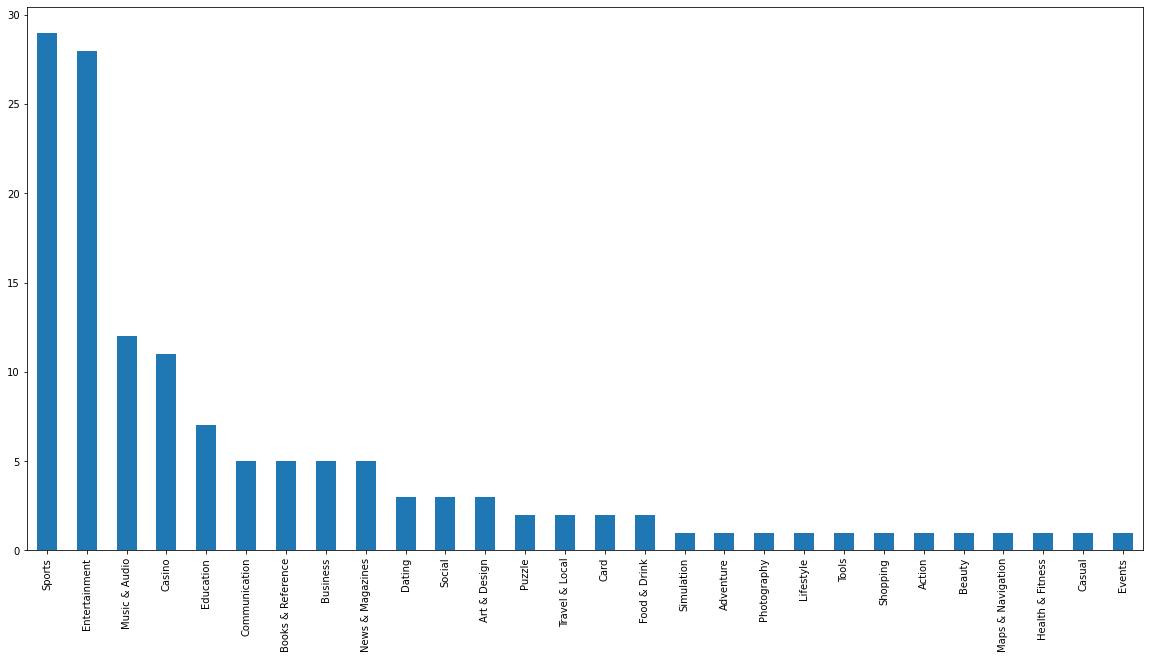

In [31]:
x=df1[df1['Content Rating']=='Adults only 18+']['Category'].value_counts()
x.plot(figsize=(20,10),kind='bar')

<AxesSubplot:>

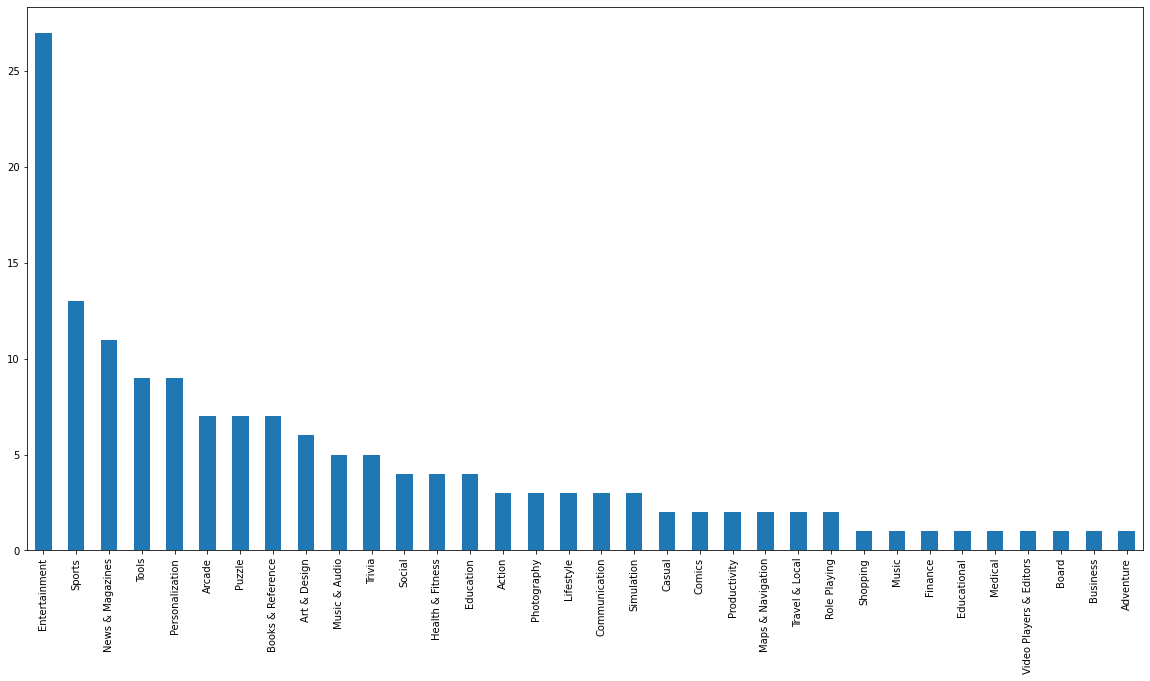

In [32]:
x=df1[df1['Content Rating']=='Unrated']['Category'].value_counts()
x.plot(figsize=(20,10),kind='bar')

<AxesSubplot:>

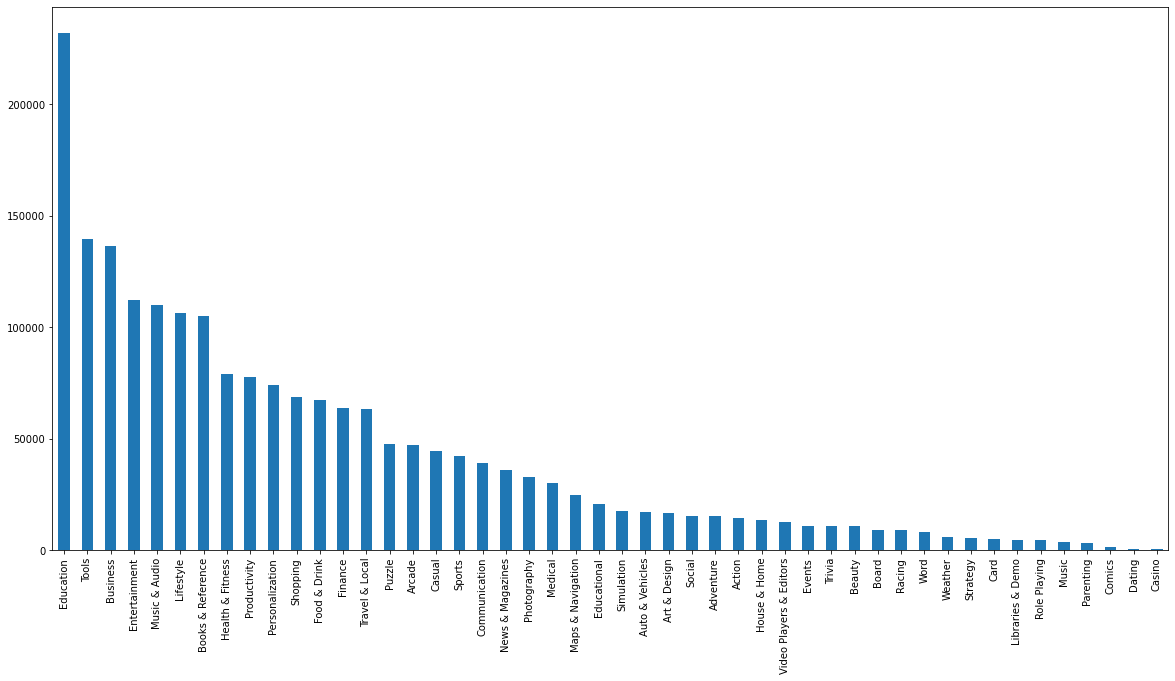

In [33]:
x=df1[df1['Content Rating']=='Everyone']['Category'].value_counts()
x.plot(figsize=(20,10),kind='bar')

<AxesSubplot:>

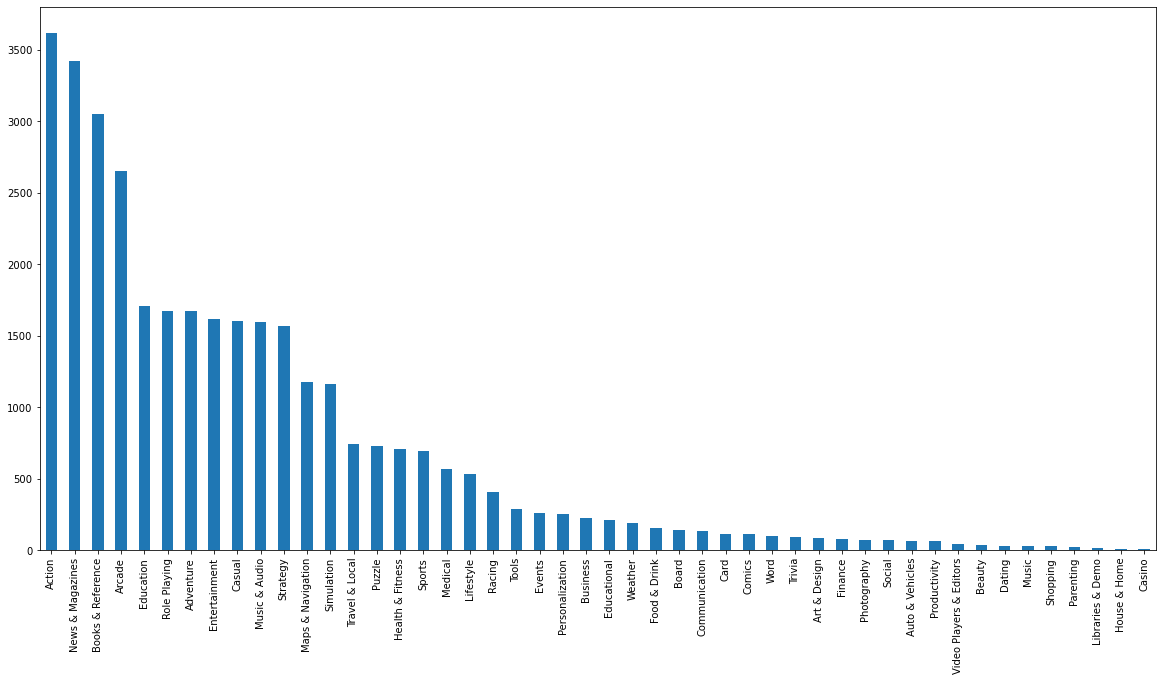

In [34]:
x=df1[df1['Content Rating']=='Everyone 10+']['Category'].value_counts()
x.plot(figsize=(20,10),kind='bar')

<AxesSubplot:>

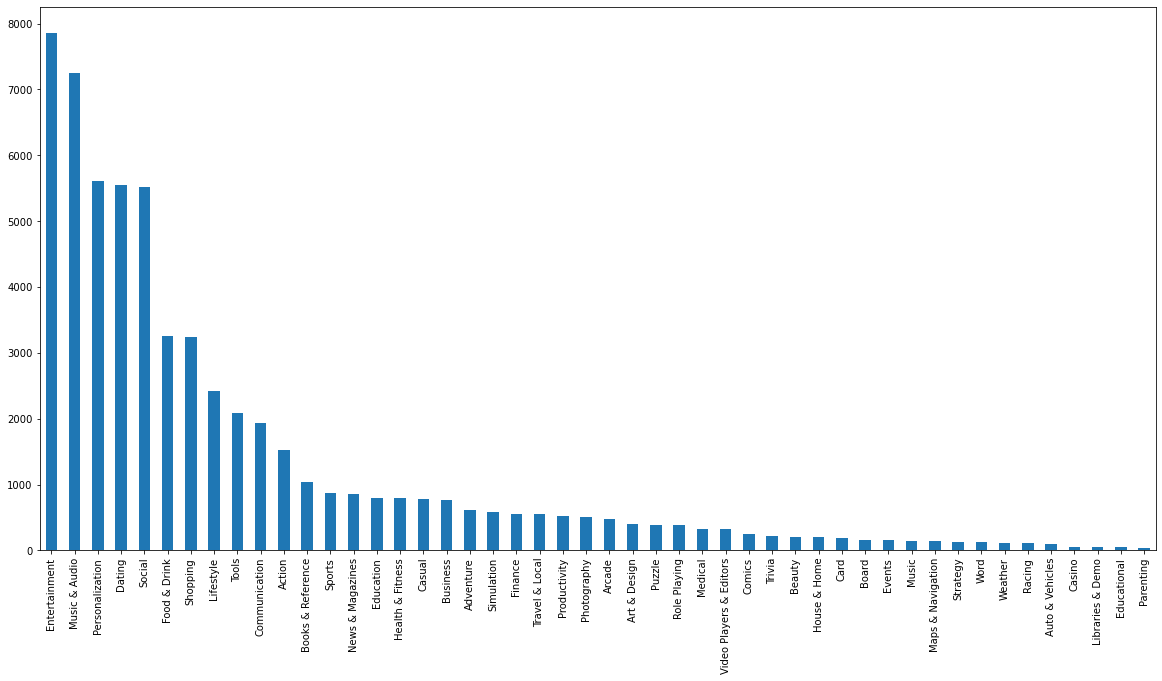

In [35]:
x=df1[df1['Content Rating']=='Mature 17+']['Category'].value_counts()
x.plot(figsize=(20,10),kind='bar')

<AxesSubplot:>

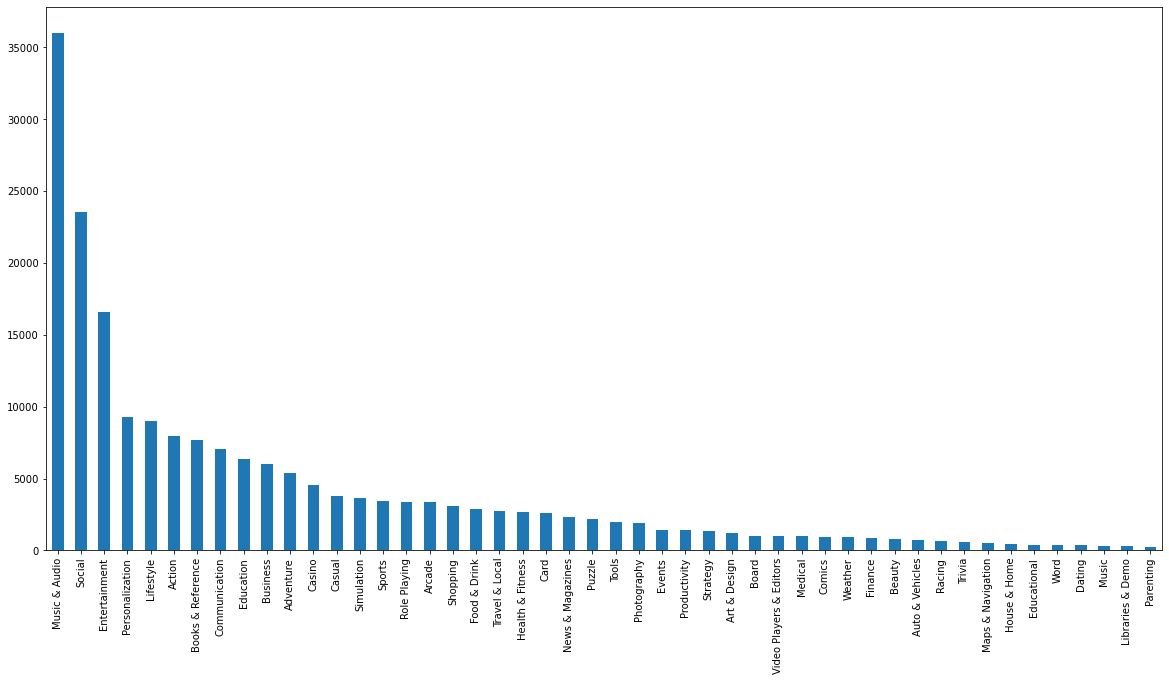

In [36]:
x=df1[df1['Content Rating']=='Teen']['Category'].value_counts()
x.plot(figsize=(20,10),kind='bar')

In [37]:
df1.groupby(['Content Rating'])['Category'].count().sort_values(ascending=False)

Content Rating
Everyone           2022087
Teen                196375
Mature 17+           60289
Everyone 10+         33901
Unrated                154
Adults only 18+        136
Name: Category, dtype: int64

In [38]:
df1.groupby(['Content Rating'])['App Name'].nunique().sort_values()

Content Rating
Adults only 18+        136
Unrated                153
Everyone 10+         33707
Mature 17+           59152
Teen                192650
Everyone           1905487
Name: App Name, dtype: int64

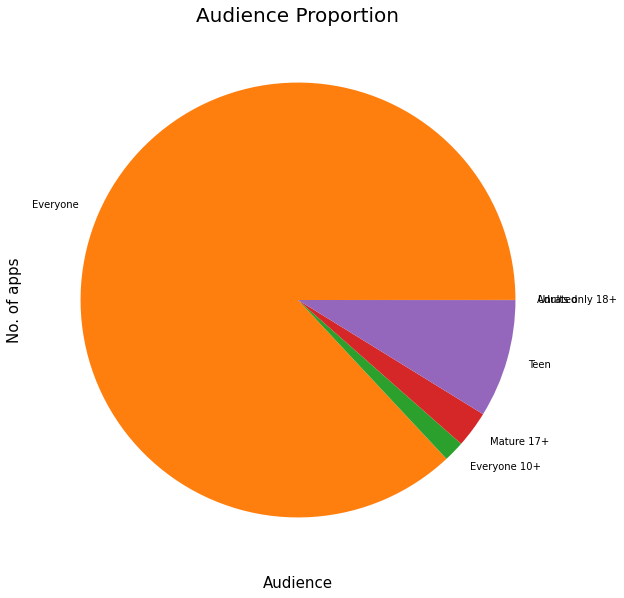

In [39]:
(df1.groupby(['Content Rating'])['App Name'].nunique()).plot(figsize = (12,10),kind='pie')
plt.xlabel('Audience', fontsize = 15)
plt.ylabel('No. of apps', fontsize = 15)
plt.grid()
plt.title('Audience Proportion',size = 20);

In [40]:
#most of the apps are rated for everyone. the least designed category is for adults only 18+

#  checking correlation

,Rating,Rating Count,Installs,Free,Price in USD,Ad Supported,In App Purchases,Editors Choice
Rating,1.000000,0.013038,0.012614,-0.010729,-0.003674,0.159709,0.152833,0.019485
Rating Count,0.013038,1.000000,0.547548,0.001397,-0.000406,0.005321,0.025558,0.137313
Installs,0.012614,0.547548,1.000000,0.001815,-0.000515,0.002882,0.016101,0.064206
Free,-0.010729,0.001397,0.001815,1.000000,-0.278831,0.123617,0.008669,-0.003157
Price in USD,-0.003674,-0.000406,-0.000515,-0.278831,1.000000,-0.034276,-0.002634,0.000503
Ad Supported,0.159709,0.005321,0.002882,0.123617,-0.034276,1.000000,0.138313,0.005702
In App Purchases,0.152833,0.025558,0.016101,0.008669,-0.002634,0.138313,1.000000,0.046078
Editors Choice,0.019485,0.137313,0.064206,-0.003157,0.000503,0.005702,0.046078,1.000000


<AxesSubplot:>

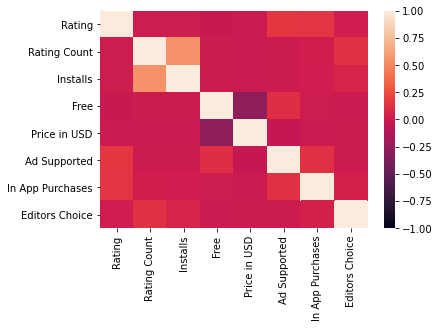

In [41]:
cor_mat = df1.corr()
cor_mat

sns.heatmap(cor_mat,vmax=1,vmin=-1)

<AxesSubplot:>

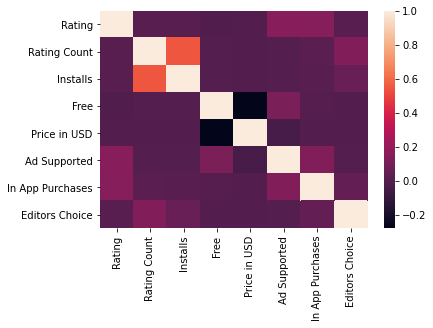

In [42]:
sns.heatmap(cor_mat)

In [43]:
#installs and rating counts  are related

In [44]:
df1.loc[(df1['Rating Count'] > 0) & (df1['Rating Count'] <= 10000.0),'Rating Type'] = 'Less than 10K'
df1.loc[(df1['Rating Count'] > 10000) & (df1['Rating Count'] <= 500000.0),'Rating Type'] = 'Between 10K and 500K'
df1.loc[(df1['Rating Count'] > 500000),'Rating Type'] = 'More than 500K'
df1['Rating Type'].value_counts(normalize=True)*100



Less than 10K           97.012081
Between 10K and 500K     2.855057
More than 500K           0.132862
Name: Rating Type, dtype: float64

In [45]:
df1.groupby(['Rating Type'])['Installs'].mean().sort_values()

Rating Type
Less than 10K           7.894977e+04
Between 10K and 500K    7.834641e+06
More than 500K          2.181192e+08
Name: Installs, dtype: float64

In [46]:
#higher the rating count,higher is the installs

#  rating analysis

In [47]:
df1.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Free,Price in USD,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Rating Type
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,15,1,0.0,10M,7.1 and up,2020-02-26,2020-02-26,Everyone,0,0,0,NaN
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,7662,1,0.0,2.9M,5.0 and up,2020-05-21,2021-05-06,Everyone,1,0,0,Less than 10K
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,58,1,0.0,3.7M,4.0.3 and up,2019-08-09,2019-08-19,Everyone,0,0,0,NaN
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,19,1,0.0,1.8M,4.0.3 and up,2018-09-10,2018-10-13,Everyone,1,0,0,Less than 10K
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,478,1,0.0,6.2M,4.1 and up,2020-02-21,2018-11-12,Everyone,0,0,0,NaN


In [48]:
df1.groupby(['Rating'])['App Name'].count().sort_values()

Rating
1.100000        236
1.200000        531
1.300000        579
1.000000        713
1.400000       1011
1.500000       1157
1.600000       1644
1.700000       1928
1.900000       2588
1.800000       2957
2.100000       3675
2.000000       3804
2.200000       4954
2.300000       5414
2.400000       6050
2.500000       6942
2.700000       9200
2.600000       9213
2.900000      11522
2.800000      12235
3.100000      15539
3.000000      17275
3.200000      21485
3.300000      22613
2.202358      22883
3.400000      28908
3.500000      31636
3.600000      35989
3.700000      43300
4.900000      44524
3.800000      53863
3.900000      55684
4.800000      61109
4.700000      62205
4.000000      67342
4.100000      69723
4.500000      76753
4.600000      78302
4.300000      83275
4.400000      86304
4.200000      87993
5.000000     100122
0.000000    1059762
Name: App Name, dtype: int64

In [49]:
##thus most no of apps have 0 ratings,5 is the 2nd most rating
#the rating 1.1 has min no of apps

In [50]:
(df1.groupby(['Rating'])['App Name'].count()).mean()


53789.348837209305

In [51]:
df1['Rating'][df1['Rating']>0.0].mean()
df1['Rating'].mean()

4.066248476383304

2.203142692568179

In [52]:
df1['Rating'][df1['Rating']>0.0].median()
df1['Rating'].median()

4.2

2.8

In [53]:
df1['Rating'].max(), df1[df1['Rating']==5.0]['App Name'].count()

df1['Rating'].min(), df1[df1['Rating']==0.0]['App Name'].count()

'1.1', df1[df1['Rating']==1.1]['App Name'].count()

(5.0, 100122)

(0.0, 1059762)

('1.1', 236)

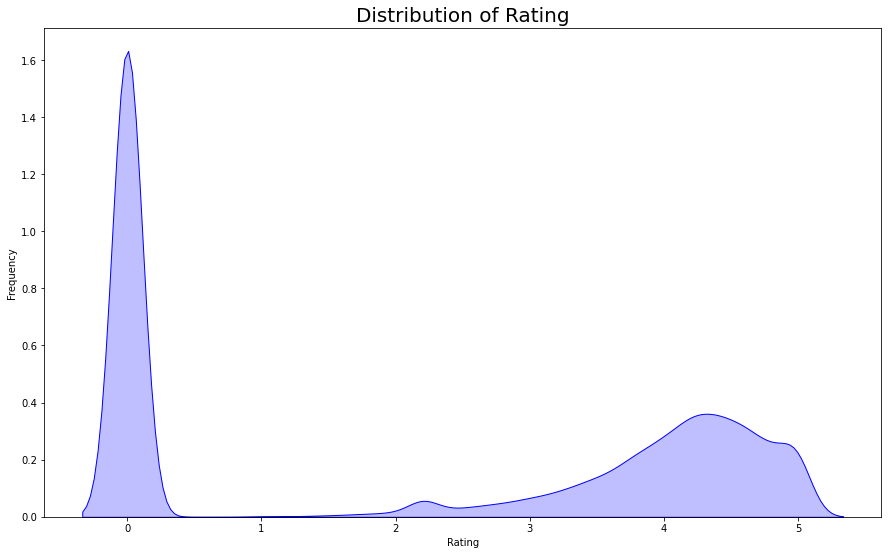

In [54]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df1.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

In [55]:
# 0 rating may be because some people hadnt given any rating. 
#if we omit 0 rating, rating frequency is uniformily distributed and 50 percentile of the apps are above 4.2 rating

#  categorical analysis

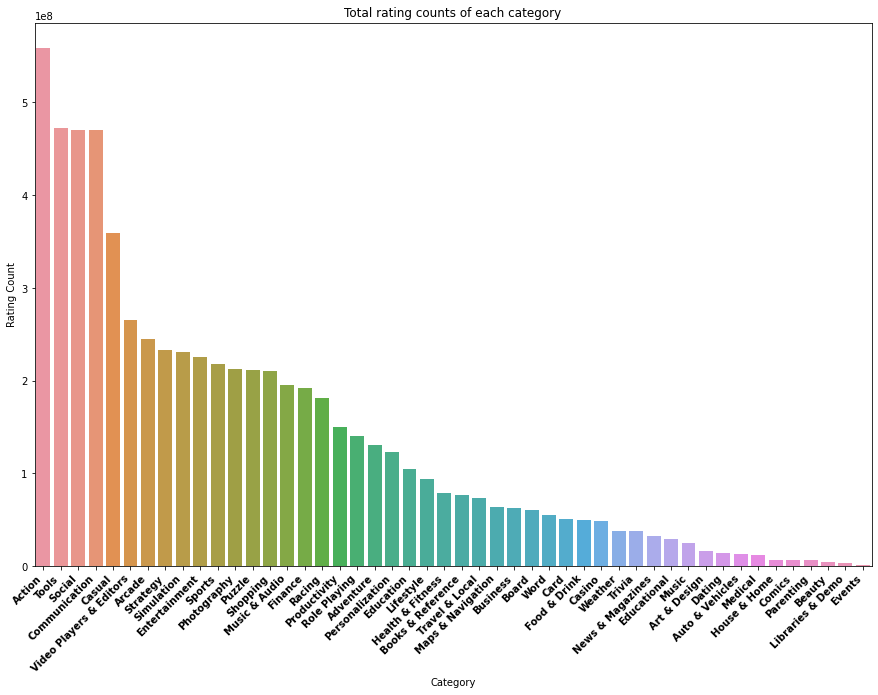

In [56]:
category_rating = df1.groupby(['Category'])['Rating Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(category_rating.index, category_rating.values)
plt.title('Total rating counts of each category')
plt.xlabel('Category')
plt.ylabel('Rating Count')
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');

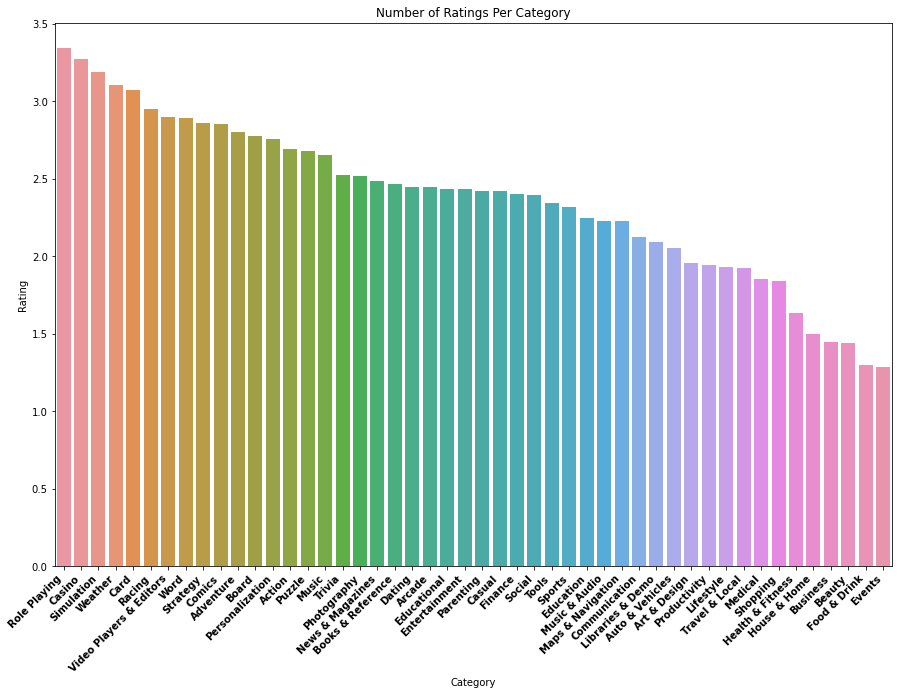

In [57]:
category_rating = df1.groupby(['Category'])['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(category_rating.index, category_rating.values)
plt.title('Number of Ratings Per Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');

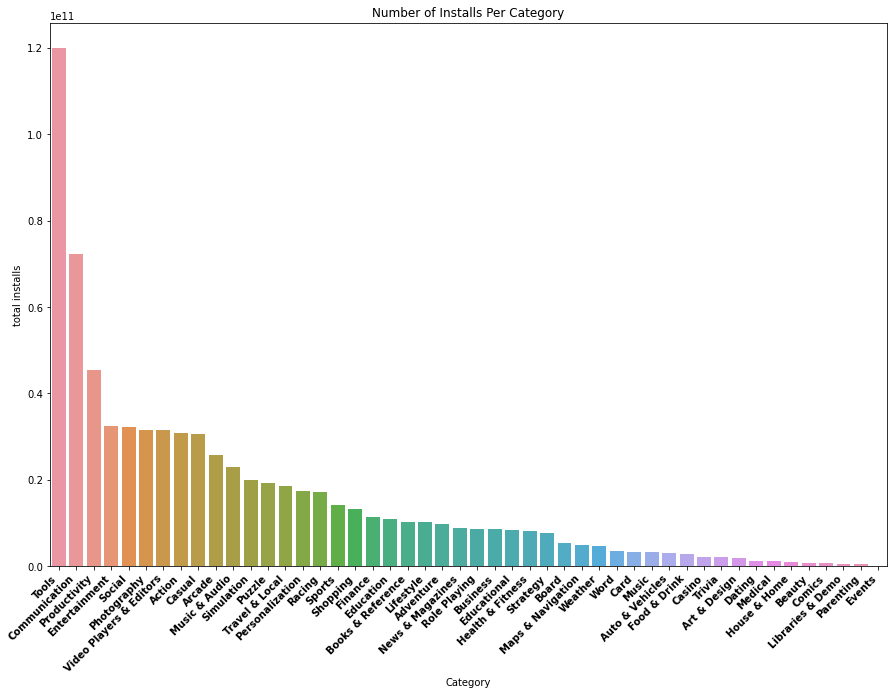

In [58]:
category_rating = df1.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(category_rating.index, category_rating.values)
plt.title('Number of Installs Per Category')
plt.xlabel('Category')
plt.ylabel('total installs')
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');

In [59]:
df1.groupby(['Category'])['Installs'].mean().sort_values(ascending=False)

Category
Video Players & Editors    2.243268e+06
Racing                     1.649656e+06
Communication              1.501161e+06
Action                     1.115665e+06
Strategy                   9.021062e+05
Photography                8.885846e+05
Role Playing               8.616850e+05
Simulation                 8.571885e+05
Tools                      8.323576e+05
Music                      7.762119e+05
Social                     7.201878e+05
Weather                    6.383209e+05
Casual                     6.007374e+05
Productivity               5.692531e+05
Board                      4.988241e+05
Arcade                     4.774385e+05
Casino                     4.379218e+05
Adventure                  4.231656e+05
Card                       4.084729e+05
Word                       4.013861e+05
Educational                3.884367e+05
Puzzle                     3.745266e+05
Sports                     2.985852e+05
Travel & Local             2.755614e+05
Comics                     2.47

In [60]:
#action category has got maximum rating counts
#roleplaying is the category with highest mean rating
#most instaaled category is tools
#events is the least preferred category in almost every cases

In [61]:
y = df1['Category'].value_counts().index
x = df1['Category'].value_counts()
xaxis = []
yaxis = []
for i in range(len(x)):
    xaxis.append(x[i])
    yaxis.append(y[i])

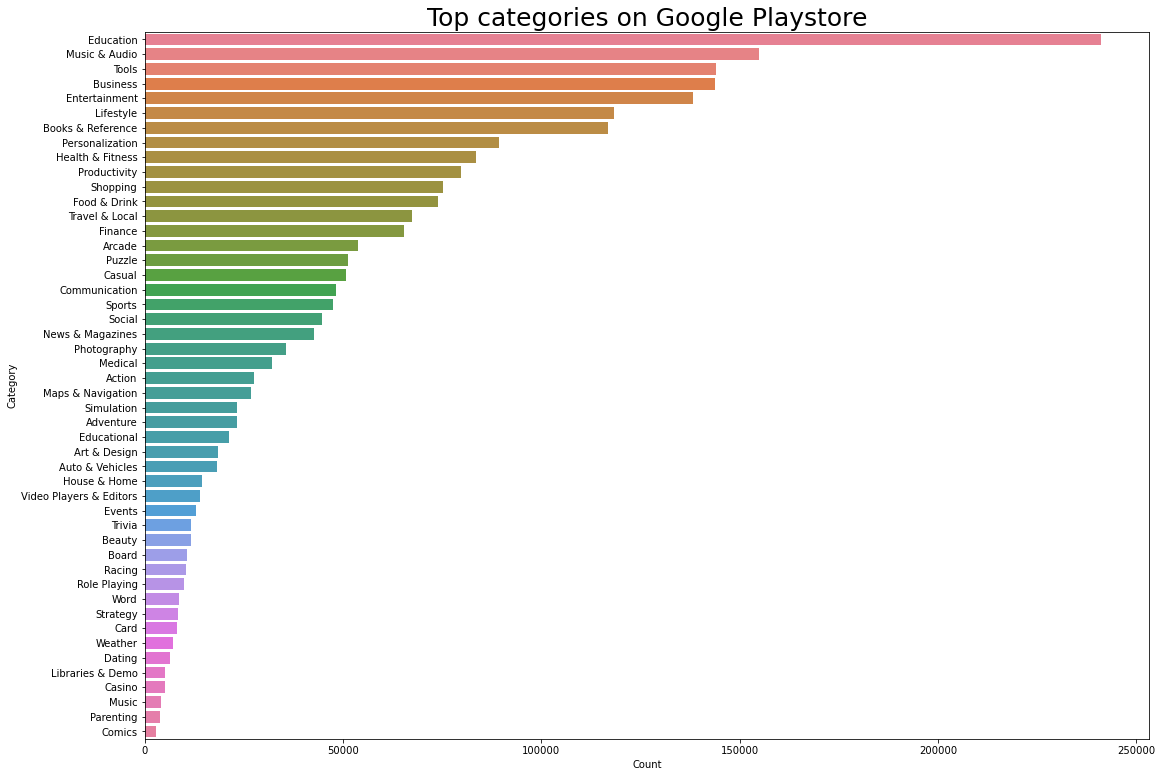

In [62]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xaxis, y = yaxis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

In [63]:
top_7_list = [
    'Education', 'Music & Audio', 'Business', 'Tools', 
    'Entertainment', 'Lifestyle', 
    'Books & Reference'
]

top = df1[df1['Category'].isin(top_7_list)].reset_index(drop=True)

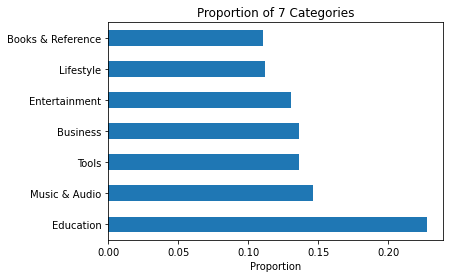

In [64]:
fig, ax = plt.subplots()

# Plot a normalized countplot
top['Category'].value_counts(normalize=True).plot.barh()

# Label
ax.set(title='Proportion of 7 Categories',
       xlabel='Proportion', ylabel='')

plt.show();

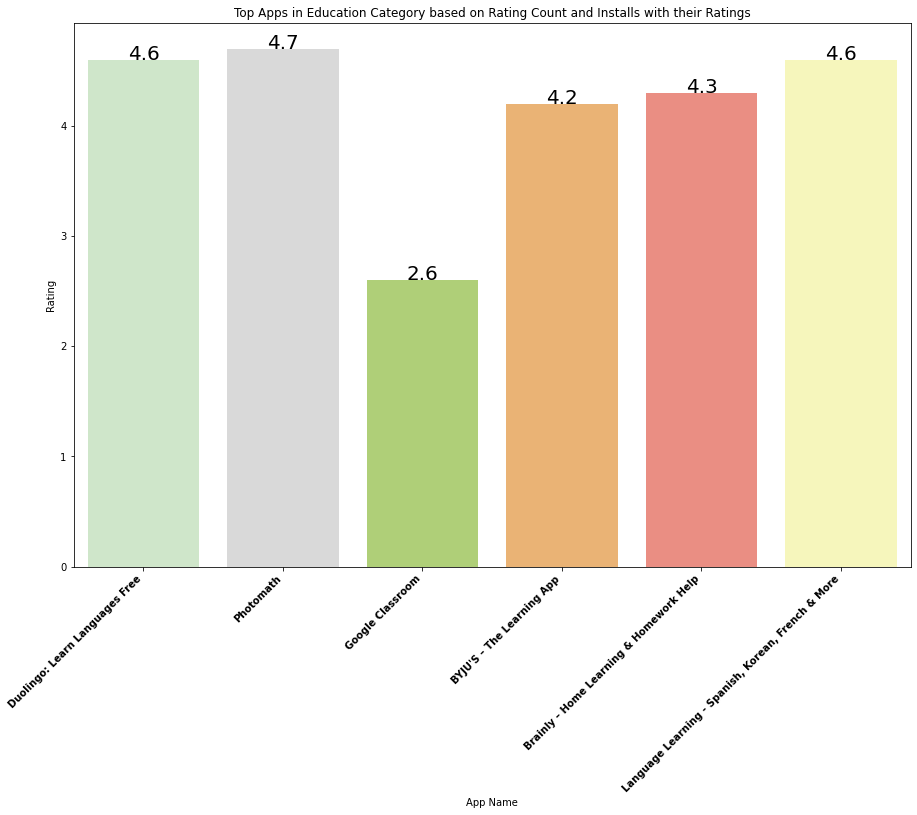

In [65]:
df_e = df1.loc[(df1.Installs > 1000000) & (df1['Rating Count'] > 1000000) & (df1.Category == "Education")]
df_e = df_e.sort_values(by=['Rating Count'],ascending=False).head(10)

plt.figure(figsize=(15,10))

ax = sns.barplot(df_e['App Name'], df_e['Rating'],palette='Set3_r')

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
    
plt.title("Top Apps in Education Category based on Rating Count and Installs with their Ratings")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');
plt.show();

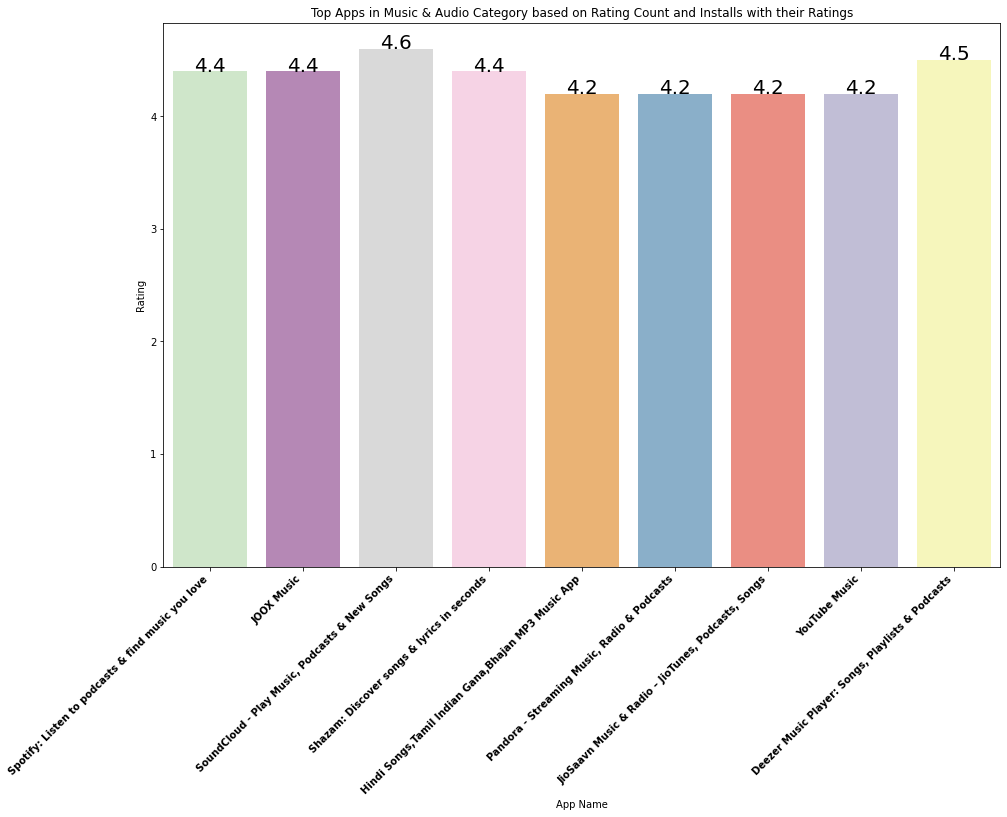

In [66]:
df_m = df1.loc[(df1.Installs > 1000000) & (df1['Rating Count'] > 1000000) & (df1.Category == "Music & Audio")]
df_m = df_m.sort_values(by=['Rating Count'],ascending=False).head(10)

plt.figure(figsize=(15,10))

ax = sns.barplot(df_m['App Name'], df_m['Rating'],palette='Set3_r')

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
    
plt.title("Top Apps in Music & Audio Category based on Rating Count and Installs with their Ratings")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');
plt.show();

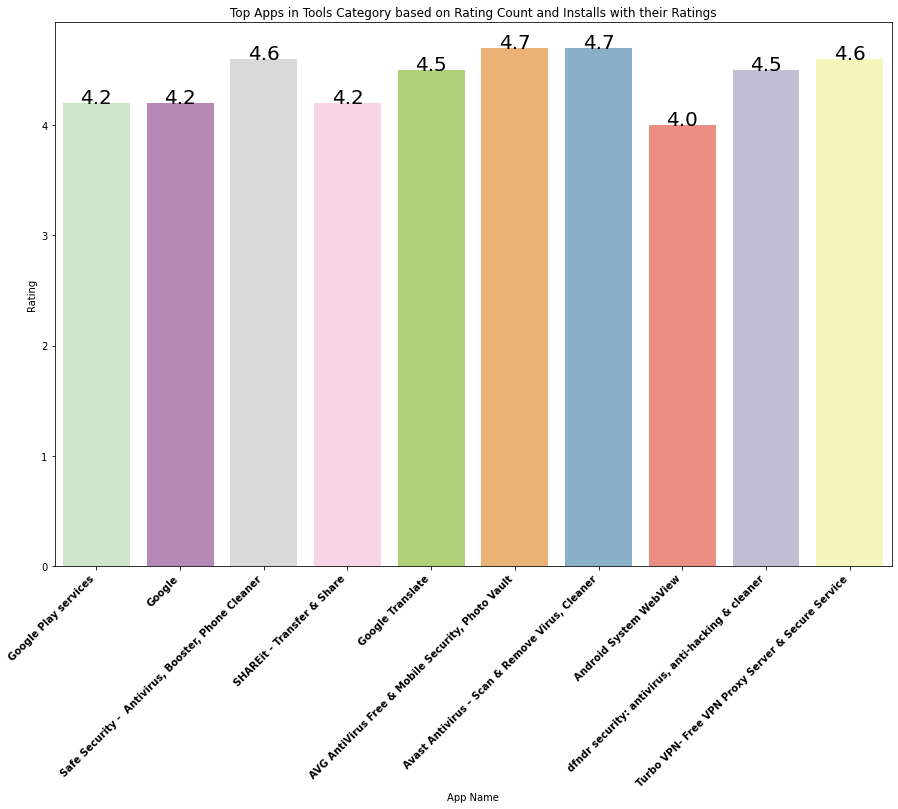

In [67]:
df_t = df1.loc[(df1.Installs > 1000000) & (df1['Rating Count'] > 1000000) & (df1.Category == "Tools")]
df_t = df_t.sort_values(by=['Rating Count'],ascending=False).head(10)

plt.figure(figsize=(15,10))

ax = sns.barplot(df_t['App Name'], df_t['Rating'],palette='Set3_r')

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
    
plt.title("Top Apps in Tools Category based on Rating Count and Installs with their Ratings")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');
plt.show();

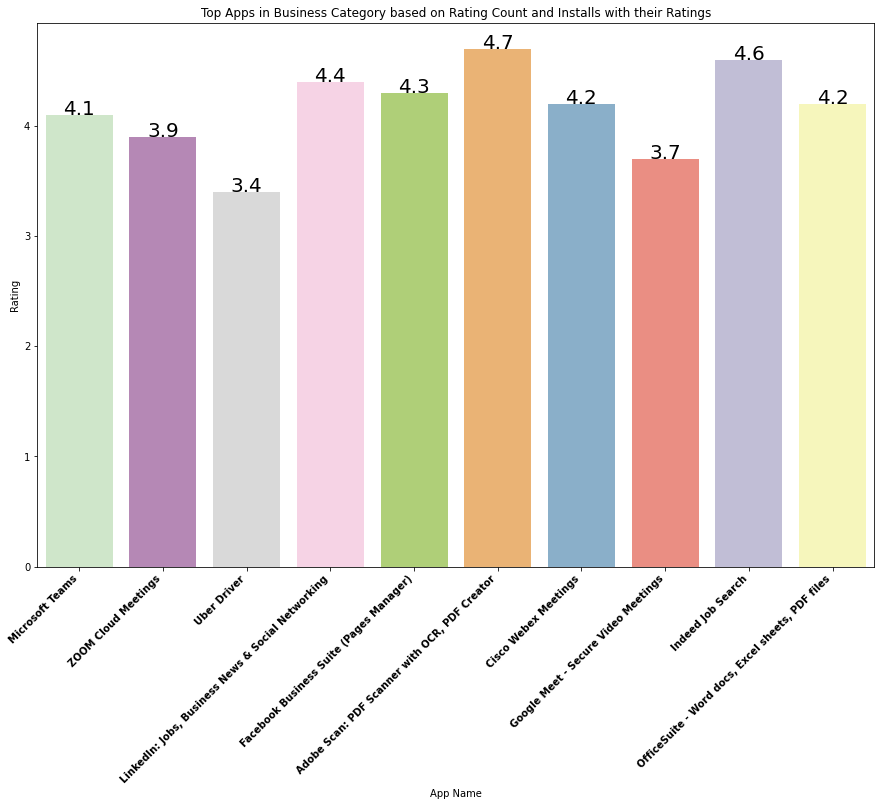

In [68]:
df_b = df1.loc[(df1.Installs > 1000000) & (df1['Rating Count'] > 1000000) & (df1.Category == "Business")]
df_b = df_b.sort_values(by=['Rating Count'],ascending=False).head(10)

plt.figure(figsize=(15,10))

ax = sns.barplot(df_b['App Name'], df_b['Rating'],palette='Set3_r')

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
    
plt.title("Top Apps in Business Category based on Rating Count and Installs with their Ratings")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');
plt.show();

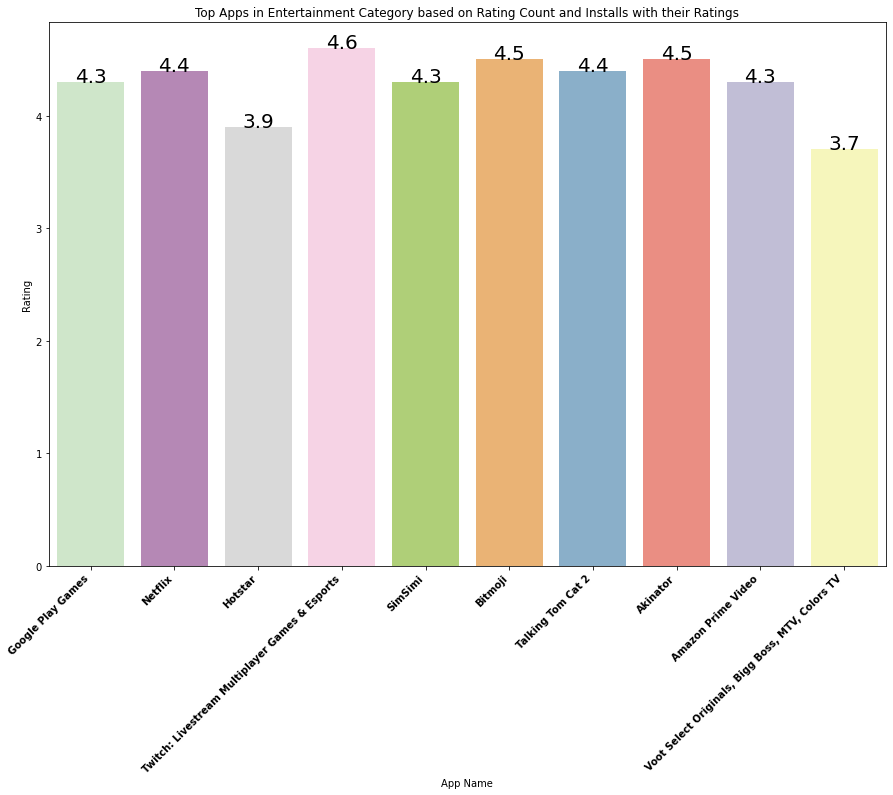

In [69]:
df_e = df1.loc[(df1.Installs > 1000000) & (df1['Rating Count'] > 1000000) & (df1.Category == "Entertainment")]
df_e = df_e.sort_values(by=['Rating Count'],ascending=False).head(10)

plt.figure(figsize=(15,10))

ax = sns.barplot(df_e['App Name'], df_e['Rating'],palette='Set3_r')

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
    
plt.title("Top Apps in Entertainment Category based on Rating Count and Installs with their Ratings")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');
plt.show();

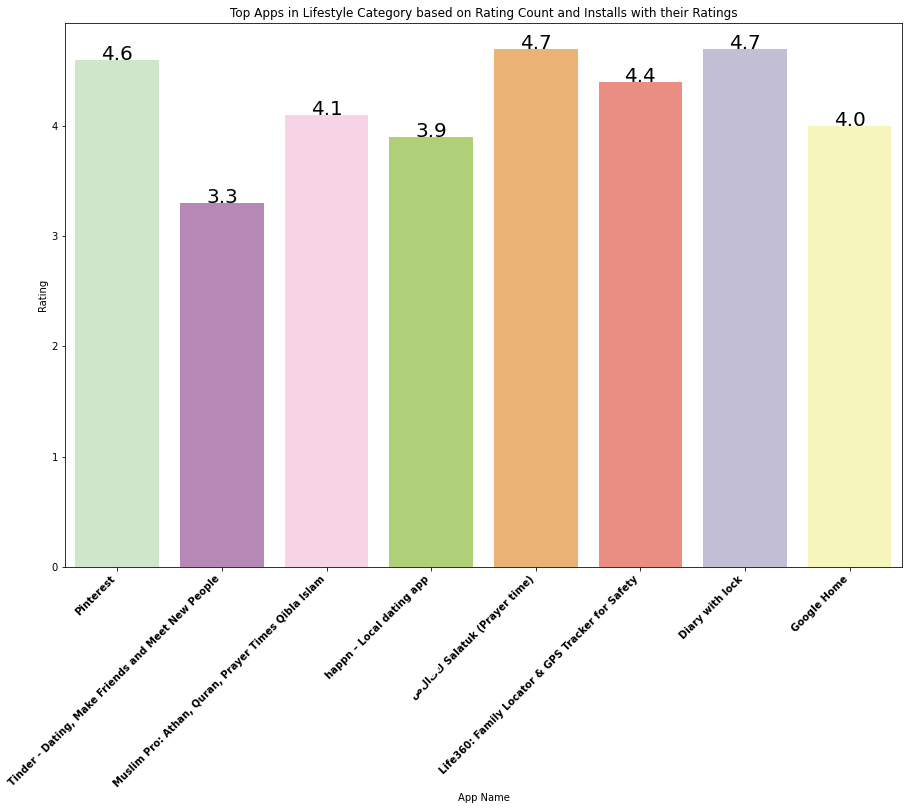

In [70]:
df_l = df1.loc[(df1.Installs > 1000000) & (df1['Rating Count'] > 1000000) & (df1.Category == "Lifestyle")]
df_l = df_l.sort_values(by=['Rating Count'],ascending=False).head(10)

plt.figure(figsize=(15,10))

ax = sns.barplot(df_l['App Name'], df_l['Rating'],palette='Set3_r')

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
    
plt.title("Top Apps in Lifestyle Category based on Rating Count and Installs with their Ratings")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');
plt.show();

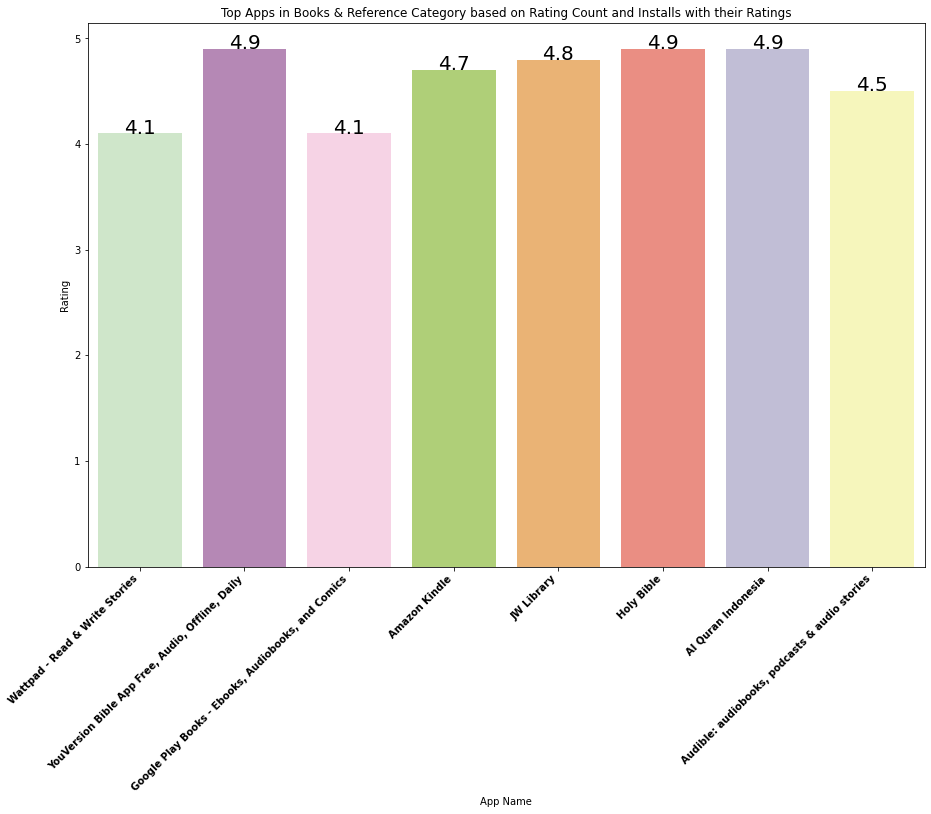

In [71]:
df_b = df1.loc[(df1.Installs > 1000000) & (df1['Rating Count'] > 1000000) & (df1.Category == "Books & Reference")]
df_b = df_b.sort_values(by=['Rating Count'],ascending=False).head(10)

plt.figure(figsize=(15,10))

ax = sns.barplot(df_b['App Name'], df_b['Rating'],palette='Set3_r')

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
    
plt.title("Top Apps in Books & Reference Category based on Rating Count and Installs with their Ratings")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');
plt.show();

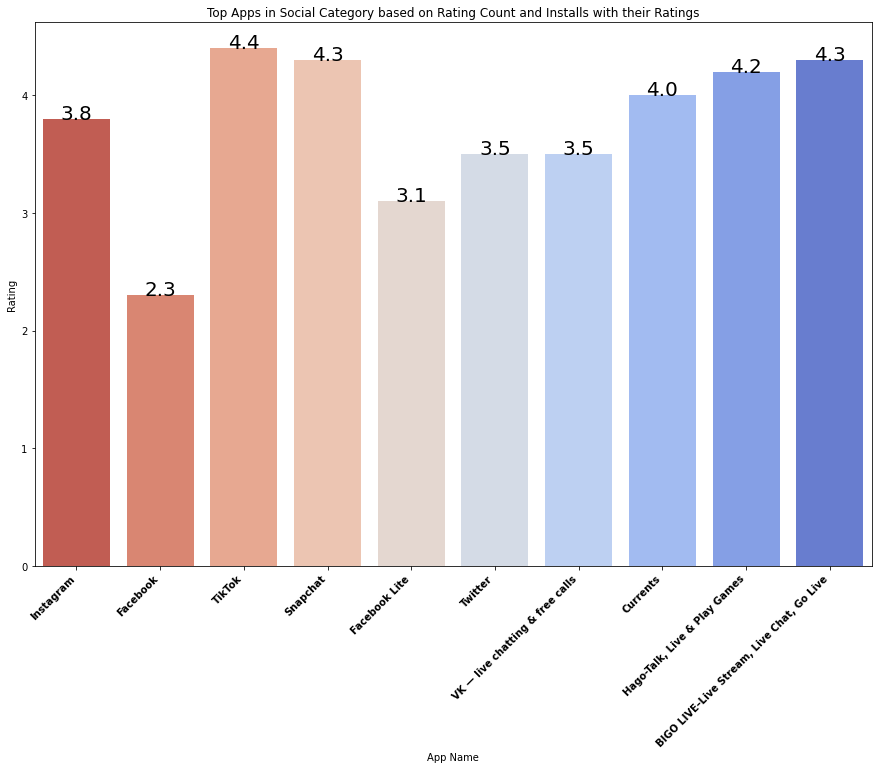

In [72]:
df_s = df1.loc[(df1.Installs > 1000000) & (df1['Rating Count'] > 1000000) & (df1.Category == "Social")]
df_s = df_s.sort_values(by=['Rating Count'],ascending=False).head(10)

plt.figure(figsize=(15,10))

ax = sns.barplot(df_s['App Name'], df_s['Rating'],palette='coolwarm_r')#'Set3_r')

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
    
plt.title("Top Apps in Social Category based on Rating Count and Installs with their Ratings")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');
plt.show();


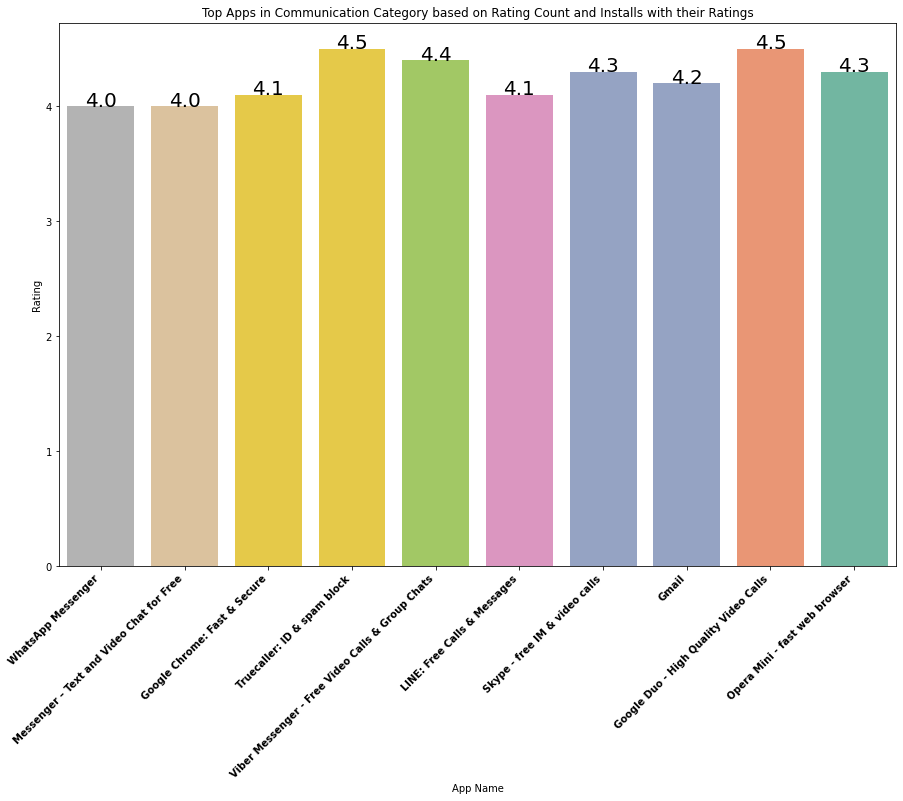

In [73]:
df_c = df1.loc[(df1.Installs > 1000000) & (df1['Rating Count'] > 1000000) & (df1.Category == "Communication")]
df_c = df_c.sort_values(by=['Rating Count'],ascending=False).head(10)

plt.figure(figsize=(15,10))

ax = sns.barplot(df_c['App Name'], df_c['Rating'],palette='Set2_r')

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
    
plt.title("Top Apps in Communication Category based on Rating Count and Installs with their Ratings")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');
plt.show();


#  price analysis

In [74]:
df1['Price in USD'].max()
df1['Price in USD'].min()

400.0

0.0

In [75]:
df1['Price in USD'][df1['Price in USD']==0.0].count()

2268009

In [76]:
df1['Price Range'] = pd.cut(df1['Price in USD'],bins=[0,0.1,150,300,410],
                          labels=['Free','Low','Mid','High'],include_lowest=True)
df1['Price Range'].value_counts()

Free    2268009
Low       44810
Mid          69
High         54
Name: Price Range, dtype: int64

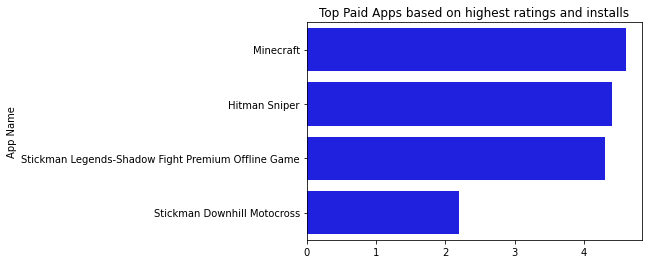

In [77]:


# Top paid apps based on their ratings and Installs

paid_apps = df1[(df1.Free==0) & (df1.Installs >= 10000000)]
paid_apps = paid_apps.groupby(['App Name'])['Rating'].max().sort_values(ascending=False).head(10)

plt.title("Top Paid Apps based on highest ratings and installs")

ax = sns.barplot(x=paid_apps.values,y=paid_apps.index,color='blue');



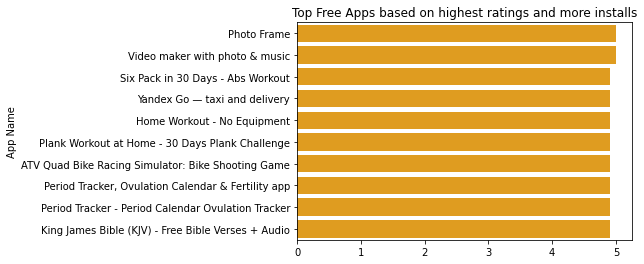

In [78]:


# Top Free apps based on their ratings and installs

free_apps = df1[(df1.Free==1) & (df1.Installs >= 10000000)]
                                                   
free_apps = free_apps.groupby(['App Name'])['Rating'].max().sort_values(ascending=False).head(10)
plt.title("Top Free Apps based on highest ratings and more installs")
sns.barplot(x=free_apps.values,y=free_apps.index,color='orange');



<Figure size 720x720 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f40b44cdbe0>,
 [Text(-1.0979396888790025, 0.06729368160741074, 'free'),
  Text(1.0979396939981467, -0.0672935980852286, 'paid')],
 [Text(-0.5988761939340013, 0.03670564451313312, '98.1%'),
  Text(0.5988761967262618, -0.036705598955579226, '1.9%')])

Text(0.5, 1.0, 'Percent of Free Vs Paid Apps in store')

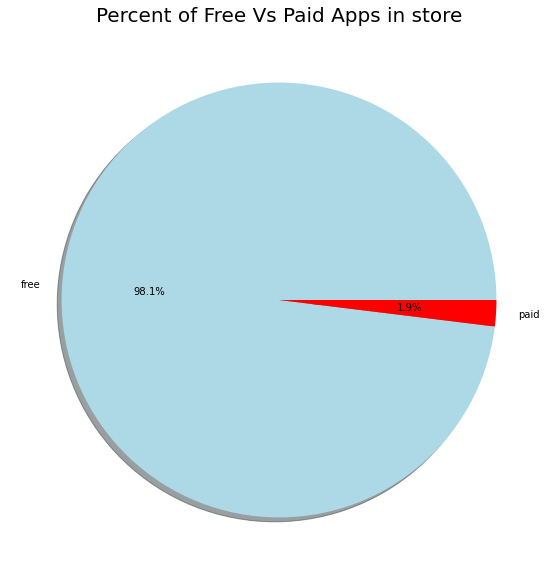

In [79]:
plt.figure(figsize=(10,10))
labels = ['free','paid']
sizes = df1['Free'].value_counts(sort = True)
colors = ["lightblue","red"]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

In [80]:
top5PaidApps = df1[df1['Free'] == 0].sort_values(by='Price in USD', ascending=False).head(5)
top5PaidApps

,App Name,App Id,Category,Rating,Rating Count,Installs,Free,Price in USD,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Rating Type,Price Range
544467,MESH Connect,com.tecit.android.bluepiano.meshconnectfull,Productivity,0.0,0.0,25,0,400.00,20M,4.4 and up,2017-09-07,2017-09-07,Everyone,0,0,0,NaN,High
268775,Taxes,appinventor.ai_woownoon2.Taxess,Business,0.0,0.0,0,0,399.99,3.4M,2.1 and up,2020-04-03,2020-04-04,Teen,0,0,0,NaN,High
284675,Accounting Provider for Green Office Flow,apph.accprovider,Tools,0.0,0.0,0,0,399.99,1.4M,3.0 and up,2018-04-19,2018-06-04,Everyone,0,0,0,NaN,High
20127,TEST EGY,com.test.egy,Tools,0.0,0.0,0,0,399.99,16M,5.0 and up,2020-06-21,2020-06-22,Everyone,0,0,0,NaN,High
2085589,Series Addict Pro - TV Guide,com.alamkanak.seriesaddict.pro,Entertainment,4.1,58.0,639,0,399.99,5.4M,5.0 and up,2014-10-08,2021-06-03,Teen,0,0,0,Less than 10K,High


In [81]:
top5PaidApps = df1[df1['Free'] == 0].sort_values(by='Installs', ascending=False).head(5)
top5PaidApps

,App Name,App Id,Category,Rating,Rating Count,Installs,Free,Price in USD,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Rating Type,Price Range
837350,Minecraft,com.mojang.minecraftpe,Arcade,4.600000,4132618.0,36183322,0,7.49,Varies with device,5.0 and up,2011-08-15,2021-05-27,Everyone 10+,0,1,1,More than 500K,Low
508695,Hitman Sniper,com.squareenixmontreal.hitmansniperandroid,Action,4.400000,854992.0,24958893,0,0.99,48M,4.1 and up,2015-06-03,2020-08-24,Mature 17+,1,1,1,More than 500K,Low
1859982,Stickman Legends-Shadow Fight Premium Offline ...,com.zitga.ninja.stickman.legends.shadow.wars,Action,4.300000,235762.0,13264461,0,0.99,126M,5.0 and up,2017-05-10,2021-06-08,Everyone 10+,1,1,0,Between 10K and 500K,Low
1354757,Stickman Downhill Motocross,com.djinnworks.StickmanDownhillMotocross,Racing,2.202358,6.0,12493513,0,0.00,50M,4.1 and up,2014-01-31,2020-05-27,Everyone,1,1,0,Less than 10K,Free
6302,True Skate,com.trueaxis.trueskate,Sports,4.400000,191460.0,7040478,0,1.99,99M,4.1 and up,2013-07-19,2021-06-07,Everyone,1,1,0,Between 10K and 500K,Low


In [82]:
top5PaidApps = df1[df1['Free'] == 0].sort_values(by='Rating', ascending=False).head(5)
top5PaidApps

,App Name,App Id,Category,Rating,Rating Count,Installs,Free,Price in USD,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Rating Type,Price Range
806325,eWealth: Generate Risk-Free Passive Income,com.ewealthapp,Finance,5.0,5.0,66,0,0.99,5.7M,4.4 and up,2019-05-24,2019-09-13,Everyone,0,1,0,Less than 10K,Low
615531,CowCalf,com.cowcalf.cowrecords,Productivity,5.0,6.0,342,0,14.99,38M,4.0 and up,2014-05-19,2017-02-10,Everyone,0,0,0,Less than 10K,Low
2041619,KWGT Art Widgets II,com.artwidgetdi.kustom.pack,Personalization,5.0,7.0,168,0,0.99,39M,5.0 and up,2018-08-22,2018-08-23,Everyone,0,0,0,Less than 10K,Low
2281342,Learn Argentine Tango,dev.tango.vol1,Education,5.0,8.0,222,0,9.99,2.6M,2.1 and up,2013-02-28,2013-08-15,Everyone,0,0,0,Less than 10K,Low
1696286,Dialing God,com.kabbalah.dialinggod,Health & Fitness,5.0,27.0,790,0,9.99,33M,4.4 and up,2017-12-06,2019-03-10,Everyone,0,0,0,Less than 10K,Low


In [83]:
top5PaidApps = df1[df1['Free'] == 0].sort_values(by='Rating Count', ascending=False).head(5)
top5PaidApps

,App Name,App Id,Category,Rating,Rating Count,Installs,Free,Price in USD,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Rating Type,Price Range
837350,Minecraft,com.mojang.minecraftpe,Arcade,4.6,4132618.0,36183322,0,7.49,Varies with device,5.0 and up,2011-08-15,2021-05-27,Everyone 10+,0,1,1,More than 500K,Low
508695,Hitman Sniper,com.squareenixmontreal.hitmansniperandroid,Action,4.4,854992.0,24958893,0,0.99,48M,4.1 and up,2015-06-03,2020-08-24,Mature 17+,1,1,1,More than 500K,Low
1093848,Geometry Dash,com.robtopx.geometryjump,Arcade,4.6,780332.0,4827946,0,1.99,85M,4.0 and up,2013-08-12,2017-11-15,Everyone,0,0,0,More than 500K,Low
394622,Grand Theft Auto: San Andreas,com.rockstargames.gtasa,Action,4.0,624980.0,3549625,0,6.99,15M,7.0 and up,2013-12-19,2019-04-13,Mature 17+,0,0,0,More than 500K,Low
411818,Nova Launcher Prime,com.teslacoilsw.launcher.prime,Personalization,4.7,344814.0,4890831,0,4.99,Varies with device,Varies with device,2012-02-23,2020-12-22,Everyone,0,0,0,Between 10K and 500K,Low


In [84]:
#highest earning apps
paidapps= df1[df1['Free'] == 0]
earningapps = paidapps[['App Name', 'Installs', 'Price in USD']]
earningapps['Earnings'] = earningapps['Installs'] * earningapps['Price in USD']
topearningapps=earningapps.sort_values(by='Earnings', ascending=False).head(25)
topearningapps

,App Name,Installs,Price in USD,Earnings
837350,Minecraft,36183322,7.49,2.710131e+08
1933738,Poweramp Full Version Unlocker,5481771,4.99,2.735404e+07
714227,OfficeSuite Pro + PDF,1263573,19.99,2.525882e+07
394622,Grand Theft Auto: San Andreas,3549625,6.99,2.481188e+07
508695,Hitman Sniper,24958893,0.99,2.470930e+07
411818,Nova Launcher Prime,4890831,4.99,2.440525e+07
1357652,Sleep as Android Unlock 💤 Sleep cycle smart alarm,1242794,15.99,1.987228e+07
1671494,Monument Valley,4525632,3.99,1.805727e+07
1503646,[Legacy] Alarmy (Sleep If U Can),45305,379.99,1.721545e+07
1480082,LockMyPix Photo Vault PRO: Hide Photos and Videos,104471,162.99,1.702773e+07


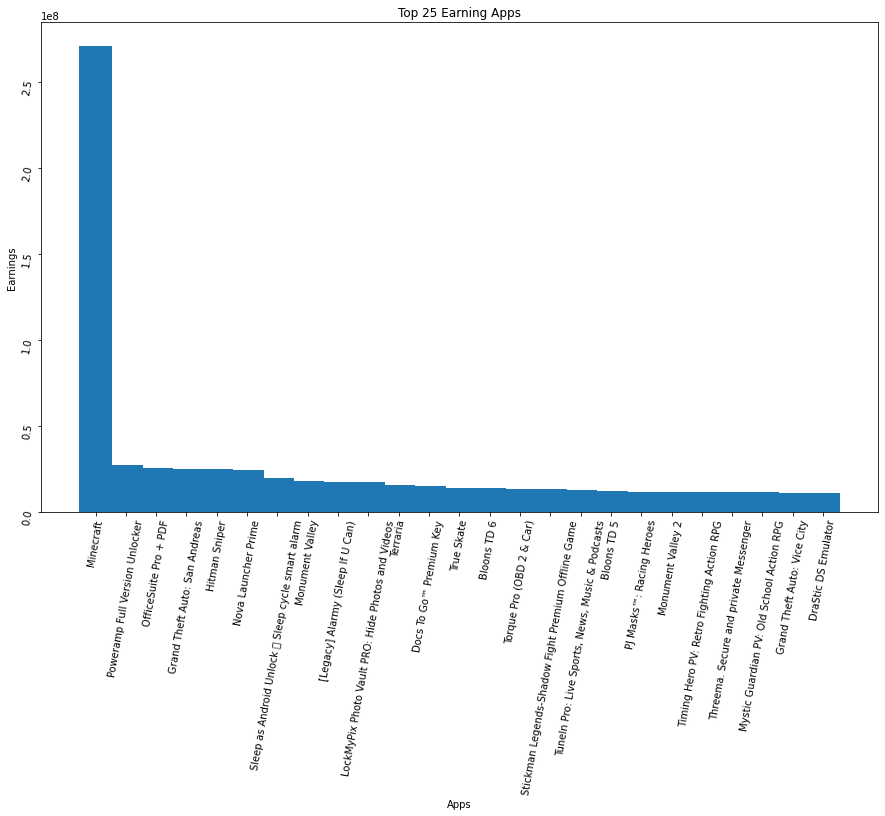

In [85]:
# PLot a bar chart of earning at y and app names at x
plt.figure(figsize=(15,9))
plt.bar(topearningapps['App Name'], topearningapps['Earnings'], width=1.1)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=80)
plt.title("Top 25 Earning Apps");

# Apps with most Rating counts

In [86]:
df1.sort_values('Rating Count', ascending=False).head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Free,Price in USD,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Rating Type,Price Range
385469,WhatsApp Messenger,com.whatsapp,Communication,4.0,138557570.0,6265637751,1,0.0,Varies with device,Varies with device,2010-10-18,2021-06-09,Everyone,0,0,1,More than 500K,Free
304823,Instagram,com.instagram.android,Social,3.8,120206190.0,3559871277,1,0.0,Varies with device,Varies with device,2012-04-03,2021-06-14,Teen,1,1,1,More than 500K,Free
2222699,Facebook,com.facebook.katana,Social,2.3,117850066.0,6782619635,1,0.0,Varies with device,Varies with device,2021-06-16,2021-06-16,Teen,1,1,0,More than 500K,Free
881402,YouTube,com.google.android.youtube,Video Players & Editors,4.4,112440547.0,9766230924,1,0.0,Varies with device,Varies with device,2010-10-20,2021-06-16,Teen,1,0,0,More than 500K,Free
244318,Garena Free Fire - Rampage,com.dts.freefireth,Action,4.2,89177097.0,976536041,1,0.0,Varies with device,4.1 and up,2017-12-07,2021-06-04,Mature 17+,0,1,1,More than 500K,Free
2095851,Messenger – Text and Video Chat for Free,com.facebook.orca,Communication,4.0,78563229.0,5054312355,1,0.0,Varies with device,Varies with device,2014-01-30,2021-06-14,Everyone,0,1,1,More than 500K,Free
423996,Clash of Clans,com.supercell.clashofclans,Strategy,4.5,56025424.0,643789632,1,0.0,182M,4.4 and up,2013-09-30,2021-06-09,Everyone 10+,0,1,1,More than 500K,Free
58081,PUBG MOBILE - Traverse,com.tencent.ig,Action,4.3,37479011.0,505818718,1,0.0,Varies with device,Varies with device,2018-03-19,2021-05-10,Teen,1,1,1,More than 500K,Free
65036,TikTok,com.zhiliaoapp.musically,Social,4.4,36446381.0,1645811582,1,0.0,89M,4.4 and up,2015-07-09,2021-06-15,Teen,1,1,0,More than 500K,Free
1830961,Google Photos,com.google.android.apps.photos,Photography,4.5,35369236.0,5754179589,1,0.0,Varies with device,Varies with device,2015-05-28,2021-06-14,Everyone,0,0,0,More than 500K,Free


# maximum installed in each category,content rating etc

In [118]:
df1.groupby(['Content Rating','Category'])['Category'].count()

Content Rating   Category               
Adults only 18+  Action                          1
                 Adventure                       1
                 Art & Design                    3
                 Beauty                          1
                 Books & Reference               5
                 Business                        5
                 Card                            2
                 Casino                         11
                 Casual                          1
                 Communication                   5
                 Dating                          3
                 Education                       7
                 Entertainment                  28
                 Events                          1
                 Food & Drink                    2
                 Health & Fitness                1
                 Lifestyle                       1
                 Maps & Navigation               1
                 Music & Audio           

In [109]:
df1.groupby(['Category'])['Content Rating'].count().sort_values(ascending=False)

Category
Education                  241090
Music & Audio              154906
Tools                      143988
Business                   143771
Entertainment              138276
Lifestyle                  118331
Books & Reference          116728
Personalization             89210
Health & Fitness            83510
Productivity                79698
Shopping                    75256
Food & Drink                73927
Travel & Local              67288
Finance                     65466
Arcade                      53791
Puzzle                      51168
Casual                      50813
Communication               48167
Sports                      47483
Social                      44734
News & Magazines            42806
Photography                 35552
Medical                     32065
Action                      27555
Maps & Navigation           26722
Simulation                  23282
Adventure                   23203
Educational                 21308
Art & Design                18539
Auto 

In [89]:
df1.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)

Category
Tools                      119849500546
Communication               72306404399
Productivity                45368330480
Entertainment               32544902249
Social                      32216881194
Photography                 31590959146
Video Players & Editors     31439400808
Action                      30742136749
Casual                      30525269577
Arcade                      25681896219
Music & Audio               23021925877
Simulation                  19957063168
Puzzle                      19163779524
Travel & Local              18541978772
Personalization             17477377333
Racing                      17093737289
Sports                      14177721735
Shopping                    13288289453
Finance                     11385454261
Education                   10814228456
Books & Reference           10309375263
Lifestyle                   10293399960
Adventure                    9818710287
News & Magazines             8824547668
Role Playing                 86

In [90]:
df1.groupby(['Content Rating'])['Installs'].sum().sort_values(ascending=False)

Content Rating
Everyone           541403361237
Teen               146282874305
Everyone 10+        31428070851
Mature 17+          21459471726
Adults only 18+        28542966
Unrated                 6225911
Name: Installs, dtype: int64

# old or new apps

In [91]:
df1[df1['Released']==df1['Last Updated']]['Released'].shape[0]

546293

In [92]:
df1.shape[0]

2312942

In [93]:
df1['Released'].sort_values(ascending=False).head(1)
df1['Released'].sort_values(ascending=False).tail(1)

1084456    2021-06-16
Name: Released, dtype: object

1105889    2009-02-11
Name: Released, dtype: object

In [94]:
df1[df1['Released']==df1['Last Updated']]['Released'].sort_values(ascending=False).head(1)

df1[df1['Released']==df1['Last Updated']]['Released'].sort_values(ascending=False).tail(1)

2195452    2021-06-16
Name: Released, dtype: object

812050    2009-02-11
Name: Released, dtype: object

# editors choice analysis

In [95]:
df1['Editors Choice'].value_counts()

0    2312089
1        853
Name: Editors Choice, dtype: int64

In [96]:
df1.groupby(['Editors Choice'])['Rating'].max()

Editors Choice
0    5.0
1    4.9
Name: Rating, dtype: float64

In [97]:
df1.groupby(['Editors Choice'])['Rating'].median()

Editors Choice
0    2.8
1    4.4
Name: Rating, dtype: float64

In [98]:
df1.groupby(['Editors Choice'])['Installs'].sum()

Editors Choice
0    673171241968
1     67437305028
Name: Installs, dtype: int64

In [99]:
df1.groupby(['Editors Choice'])['Price in USD'].max()

Editors Choice
0    400.00
1      8.49
Name: Price in USD, dtype: float64

In [100]:
df1.groupby(['Editors Choice'])['Free'].value_counts()

Editors Choice  Free
0               1       2267057
                0         45032
1               1           817
                0            36
Name: Free, dtype: int64

In [101]:
df1.groupby(['Editors Choice'])['Ad Supported'].value_counts()

Editors Choice  Ad Supported
0               0               1161868
                1               1150221
1               1                   551
                0                   302
Name: Ad Supported, dtype: int64

In [102]:
df1.groupby(['Ad Supported'])['Free'].value_counts()
#most of the paid apps doesnt have ad supports

Ad Supported  Free
0             1       1119765
              0         42405
1             1       1148109
              0          2663
Name: Free, dtype: int64

# The End
